<h1 style="color: green;">Home task : Hierarchical clustering and DBSCAN</h1>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


# Load data

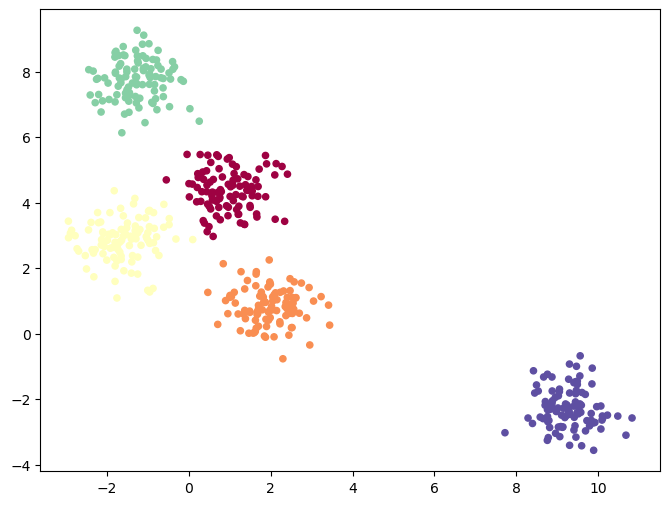

In [12]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)   

# Agglomerative clustering using `complete` linkage

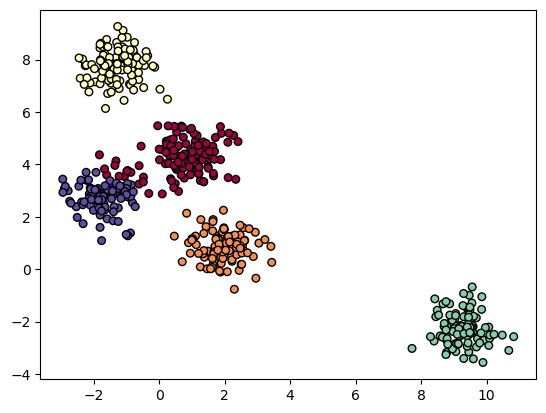

In [51]:
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=5, linkage= 'complete')  
predicted = clf.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=colors[predicted], s=30, edgecolors='black')

# Agglomerative clustering using `single` linkage

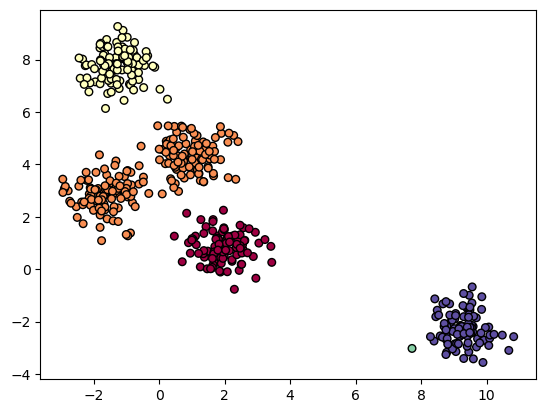

In [53]:
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=5, linkage= 'single')  
predicted = clf.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=colors[predicted], s=30, edgecolors='black')

# DBSCAN

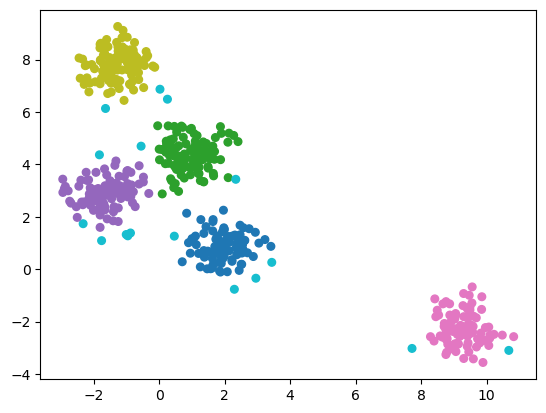

In [86]:
dbscan = DBSCAN(eps=0.5, min_samples=5, ).fit(X) 
predicted = dbscan.labels_
n_clusters_and_noice = len(np.unique(predicted))-1
predicted[np.where(predicted == -1)] = n_clusters_and_noice

plt.scatter(X[:, 0], X[:, 1], c=predicted, cmap='tab10', s=30)


# Use `elbow` method to determine the best k for Kmeans


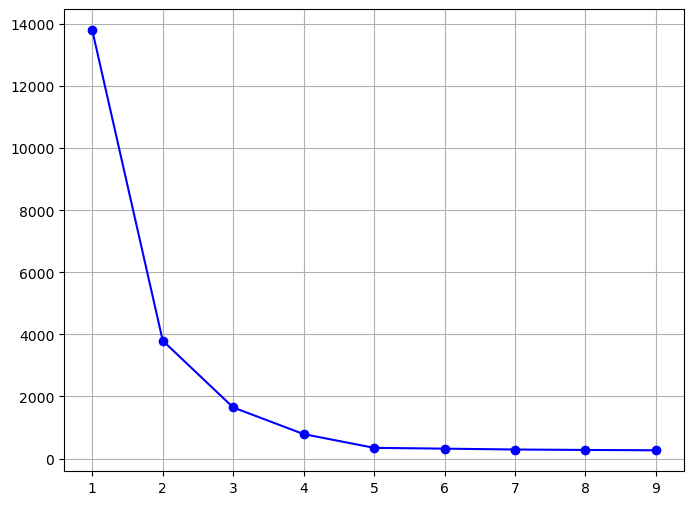

In [101]:
i = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k).fit(X)
    i.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_range, i, 'bo-')
plt.grid(True)
plt.show()



# k = 3